In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [7]:
rgbImage = cv2.imread('images/lenna_original.tif')
print('shape = ',rgbImage.shape)
# opencv读彩色图默认是按照b g r 的格式，转成r g b 的方便处理
rgbImage = cv2.cvtColor(rgbImage, cv2.COLOR_BGR2RGB)

shape =  (512, 512, 3)


In [27]:
def rgb2hsi(image):
    r,g,b = cv2.split(image)
    rows,cols = image.shape[0],image.shape[1]
    hsiImg = image.copy()
    b = b / 255.0
    g = g / 255.0
    r = r / 255.0
    for i in range(rows):
        for j in range(cols):
            sum = r[i,j] + g[i,j] + b[i,j]
            I = sum / 3
            min_rgb = min(r[i,j],g[i,j],b[i,j])
            if sum == 0:
                S = 0
            else:
                S = I - 3 / sum * min_rgb
            
            nume = round(0.5 * (r[i,j] - g[i,j] + r[i,j] - b[i,j]),15)
            deno = round(np.sqrt((r[i,j] - g[i,j]) ** 2 + (r[i,j] - b[i,j])*(g[i,j] - b[i,j])))
            theta = np.arccos(nume / deno)
           
            if deno == 0: 
                H = 0 
            elif b[i, j] <= g[i, j]: 
                H = theta 
            else: 
                H = 2*3.14169265 - theta
            H = H / (2*3.14159265)
            if H > 0 and H < (3.14159265 / 3):
                hsiImg[i,j,0] = 255
            else:
                hsiImg[i,j,0] = 0
            hsiImg[i,j,1] = S * 255
            hsiImg[i,j,2] = I * 255
            
    return hsiImg       

In [28]:
hsiImg = rgb2hsi(rgbImage)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in arccos
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


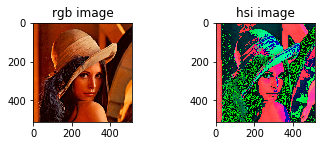

In [29]:
plt.subplot(2, 2, 1)
plt.imshow(rgbImage)
plt.title("rgb image")
plt.subplot(2, 2, 2)
plt.imshow(hsiImg)
plt.title("hsi image")

plt.show()

In [6]:
1/2.0


0.5